In [1]:
import warnings
warnings.filterwarnings("ignore")
# Libraries to read and manipulate data
import pandas as pd
import numpy as np

# libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries to tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline
from statsmodels.api import OLS, add_constant

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier

#libraries for convenience
from datetime import datetime
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
All_Players = pd.read_csv('../Resources/All_player_data.csv')
All_Players = All_Players.drop(['Unnamed: 0'],axis= 1)

In [3]:
Player_df = All_Players.drop(['GAME_ID','TEAM_ID','TEAM_ABBREVIATION','TEAM_CITY'], axis=1)
Player_df

,GAME_DATE,PLAYER_ID,PLAYER_NAME,MIN,2pointer_MADE,2pointer_ATTEMPTS,2pointer_PCT,3pointer_MADE,3pointer_ATTEMPTS,3pointer_PCT,...,FreeThrow_PCT,OFFENSIVE_REBOUNDS,DEFENSIVE_REBOUNDS,REBOUNDS_TOTAL,ASSISTS,STEALS,BLOCKS,TURNOVERS,PERSONAL_FOULS,POINTS
0,2022-03-12,1630162,Anthony Edwards,36:22,4.000,10.000,0.400,3.000,8.000,0.375,...,1.000,0.000,8.000,8.000,5.000,3.000,1.000,1.000,1.000,15.000
1,2022-03-12,1630183,Jaden McDaniels,23:54,6.000,8.000,0.750,1.000,3.000,0.333,...,1.000,2.000,4.000,6.000,0.000,0.000,2.000,2.000,6.000,14.000
2,2022-03-12,1626157,Karl-Anthony Towns,25:17,4.000,9.000,0.444,1.000,3.000,0.333,...,0.750,1.000,9.000,10.000,0.000,0.000,0.000,3.000,4.000,15.000
3,2022-03-12,1627736,Malik Beasley,30:52,4.000,9.000,0.444,4.000,9.000,0.444,...,0.000,0.000,3.000,3.000,1.000,1.000,0.000,1.000,4.000,12.000
4,2022-03-12,1626156,D'Angelo Russell,33:46,3.000,13.000,0.231,1.000,6.000,0.167,...,1.000,0.000,6.000,6.000,9.000,1.000,0.000,5.000,0.000,14.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540345,2012-10-06,202706,Jordan Hamilton,19,4.000,9.000,0.444,3.000,6.000,0.500,...,0.857,0.000,2.000,2.000,0.000,2.000,0.000,1.000,3.000,17.000
540346,2012-10-06,202702,Kenneth Faried,23,7.000,11.000,0.636,0.000,0.000,0.000,...,1.000,1.000,0.000,1.000,1.000,1.000,0.000,3.000,3.000,18.000
540347,2012-10-06,201585,Kosta Koufos,15,3.000,7.000,0.429,0.000,0.000,0.000,...,0.000,3.000,5.000,8.000,0.000,1.000,0.000,0.000,3.000,6.000
540348,2012-10-06,202389,Timofey Mozgov,19,1.000,1.000,1.000,0.000,0.000,0.000,...,0.000,1.000,2.000,3.000,1.000,0.000,0.000,4.000,2.000,2.000


In [4]:
#merging names and ID to get a less confusing part
Player_df['PLAYER_ID'] = Player_df['PLAYER_NAME'] + '-' + Player_df.PLAYER_ID.astype(str)
Player_df = Player_df.drop(['PLAYER_NAME'], axis=1)
Player_df

,GAME_DATE,PLAYER_ID,MIN,2pointer_MADE,2pointer_ATTEMPTS,2pointer_PCT,3pointer_MADE,3pointer_ATTEMPTS,3pointer_PCT,FreeThrow_MADE,...,FreeThrow_PCT,OFFENSIVE_REBOUNDS,DEFENSIVE_REBOUNDS,REBOUNDS_TOTAL,ASSISTS,STEALS,BLOCKS,TURNOVERS,PERSONAL_FOULS,POINTS
0,2022-03-12,Anthony Edwards-1630162,36:22,4.000,10.000,0.400,3.000,8.000,0.375,4.000,...,1.000,0.000,8.000,8.000,5.000,3.000,1.000,1.000,1.000,15.000
1,2022-03-12,Jaden McDaniels-1630183,23:54,6.000,8.000,0.750,1.000,3.000,0.333,1.000,...,1.000,2.000,4.000,6.000,0.000,0.000,2.000,2.000,6.000,14.000
2,2022-03-12,Karl-Anthony Towns-1626157,25:17,4.000,9.000,0.444,1.000,3.000,0.333,6.000,...,0.750,1.000,9.000,10.000,0.000,0.000,0.000,3.000,4.000,15.000
3,2022-03-12,Malik Beasley-1627736,30:52,4.000,9.000,0.444,4.000,9.000,0.444,0.000,...,0.000,0.000,3.000,3.000,1.000,1.000,0.000,1.000,4.000,12.000
4,2022-03-12,D'Angelo Russell-1626156,33:46,3.000,13.000,0.231,1.000,6.000,0.167,7.000,...,1.000,0.000,6.000,6.000,9.000,1.000,0.000,5.000,0.000,14.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540345,2012-10-06,Jordan Hamilton-202706,19,4.000,9.000,0.444,3.000,6.000,0.500,6.000,...,0.857,0.000,2.000,2.000,0.000,2.000,0.000,1.000,3.000,17.000
540346,2012-10-06,Kenneth Faried-202702,23,7.000,11.000,0.636,0.000,0.000,0.000,4.000,...,1.000,1.000,0.000,1.000,1.000,1.000,0.000,3.000,3.000,18.000
540347,2012-10-06,Kosta Koufos-201585,15,3.000,7.000,0.429,0.000,0.000,0.000,0.000,...,0.000,3.000,5.000,8.000,0.000,1.000,0.000,0.000,3.000,6.000
540348,2012-10-06,Timofey Mozgov-202389,19,1.000,1.000,1.000,0.000,0.000,0.000,0.000,...,0.000,1.000,2.000,3.000,1.000,0.000,0.000,4.000,2.000,2.000


## Decision to make:
- drop pct of scores, it might be high for players with low attempts because if you make 2 3-pointer attempts you may have a 100% accuracy which is dumb and wrong.
- drop defensive stats since they might not be good indicators for offensive value.

In [5]:
Player_df = Player_df.drop(['2pointer_PCT','3pointer_PCT','FreeThrow_PCT','DEFENSIVE_REBOUNDS','REBOUNDS_TOTAL','STEALS','BLOCKS','TURNOVERS'], axis=1)
Player_df

,GAME_DATE,PLAYER_ID,MIN,2pointer_MADE,2pointer_ATTEMPTS,3pointer_MADE,3pointer_ATTEMPTS,FreeThrow_MADE,FreeThrow_ATTEMPTS,OFFENSIVE_REBOUNDS,ASSISTS,PERSONAL_FOULS,POINTS
0,2022-03-12,Anthony Edwards-1630162,36:22,4.000,10.000,3.000,8.000,4.000,4.000,0.000,5.000,1.000,15.000
1,2022-03-12,Jaden McDaniels-1630183,23:54,6.000,8.000,1.000,3.000,1.000,1.000,2.000,0.000,6.000,14.000
2,2022-03-12,Karl-Anthony Towns-1626157,25:17,4.000,9.000,1.000,3.000,6.000,8.000,1.000,0.000,4.000,15.000
3,2022-03-12,Malik Beasley-1627736,30:52,4.000,9.000,4.000,9.000,0.000,0.000,0.000,1.000,4.000,12.000
4,2022-03-12,D'Angelo Russell-1626156,33:46,3.000,13.000,1.000,6.000,7.000,7.000,0.000,9.000,0.000,14.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540345,2012-10-06,Jordan Hamilton-202706,19,4.000,9.000,3.000,6.000,6.000,7.000,0.000,0.000,3.000,17.000
540346,2012-10-06,Kenneth Faried-202702,23,7.000,11.000,0.000,0.000,4.000,4.000,1.000,1.000,3.000,18.000
540347,2012-10-06,Kosta Koufos-201585,15,3.000,7.000,0.000,0.000,0.000,0.000,3.000,0.000,3.000,6.000
540348,2012-10-06,Timofey Mozgov-202389,19,1.000,1.000,0.000,0.000,0.000,2.000,1.000,1.000,2.000,2.000


I am eco friendly because I recycle my code

In [6]:
Player_df['GAME_DATE'] = pd.to_datetime(Player_df['GAME_DATE'],yearfirst=True)
Player_df['MIN'] = Player_df['MIN'].str[:2]
Player_df.dtypes
Player_df

,GAME_DATE,PLAYER_ID,MIN,2pointer_MADE,2pointer_ATTEMPTS,3pointer_MADE,3pointer_ATTEMPTS,FreeThrow_MADE,FreeThrow_ATTEMPTS,OFFENSIVE_REBOUNDS,ASSISTS,PERSONAL_FOULS,POINTS
0,2022-03-12,Anthony Edwards-1630162,36,4.000,10.000,3.000,8.000,4.000,4.000,0.000,5.000,1.000,15.000
1,2022-03-12,Jaden McDaniels-1630183,23,6.000,8.000,1.000,3.000,1.000,1.000,2.000,0.000,6.000,14.000
2,2022-03-12,Karl-Anthony Towns-1626157,25,4.000,9.000,1.000,3.000,6.000,8.000,1.000,0.000,4.000,15.000
3,2022-03-12,Malik Beasley-1627736,30,4.000,9.000,4.000,9.000,0.000,0.000,0.000,1.000,4.000,12.000
4,2022-03-12,D'Angelo Russell-1626156,33,3.000,13.000,1.000,6.000,7.000,7.000,0.000,9.000,0.000,14.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540345,2012-10-06,Jordan Hamilton-202706,19,4.000,9.000,3.000,6.000,6.000,7.000,0.000,0.000,3.000,17.000
540346,2012-10-06,Kenneth Faried-202702,23,7.000,11.000,0.000,0.000,4.000,4.000,1.000,1.000,3.000,18.000
540347,2012-10-06,Kosta Koufos-201585,15,3.000,7.000,0.000,0.000,0.000,0.000,3.000,0.000,3.000,6.000
540348,2012-10-06,Timofey Mozgov-202389,19,1.000,1.000,0.000,0.000,0.000,2.000,1.000,1.000,2.000,2.000


In [7]:
# I tried to make the minutes into date-time, but it just didn't work out.
Player_df['MIN'] = Player_df['MIN'].replace(':', '', regex=True)
Player_df['MIN'] = Player_df['MIN'].astype(int)
Player_df.dtypes

GAME_DATE             datetime64[ns]
PLAYER_ID                     object
MIN                            int32
2pointer_MADE                float64
2pointer_ATTEMPTS            float64
3pointer_MADE                float64
3pointer_ATTEMPTS            float64
FreeThrow_MADE               float64
FreeThrow_ATTEMPTS           float64
OFFENSIVE_REBOUNDS           float64
ASSISTS                      float64
PERSONAL_FOULS               float64
POINTS                       float64
dtype: object

In [8]:
Player_df.MIN.unique() #how do you have negative minutes. I sense some people about to get dropped.

array([36, 23, 25, 30, 33, 21, 22,  0, 16, 37, 31, 17, 14,  4, 20, 38, 42,
       12, 32, 26, 39, 35, 29,  9, 15, 27, 24,  3,  8, 34, 28, 10,  2,  1,
       19, 41, 13,  7, 11,  6,  5, 40, 18, 45, 43, 44, 46, 51, 49, 48, 56,
       55, 53, 52, 47, 50, 54, 58, 57, 59, 60, -9, -5, -7, -3, -8, -2, -4,
       78, 86, 96, 62, 93, 92, 79, 84, 72, 65, 89, 70, 64])

In [9]:
Player_df = Player_df.loc[(Player_df['MIN'] > 10)]
# A variable to count the number of games the player played in.
Player_df['GAMES'] = 1

In [10]:
yearray = np.arange(2004,2022,1)
season_2004 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2004-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2005-07-01','%Y-%m-%d'))]
season_2005 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2005-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2006-07-01','%Y-%m-%d'))]
season_2006 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2006-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2007-07-01','%Y-%m-%d'))]
season_2007 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2007-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2008-07-01','%Y-%m-%d'))]
season_2008 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2008-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2009-07-01','%Y-%m-%d'))]
season_2009 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2009-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2010-07-01','%Y-%m-%d'))]
season_2010 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2010-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2011-07-01','%Y-%m-%d'))]
season_2011 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2011-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2012-07-01','%Y-%m-%d'))]
season_2012 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2012-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2013-07-01','%Y-%m-%d'))]
season_2013 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2013-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2014-07-01','%Y-%m-%d'))]
season_2014 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2014-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2015-07-01','%Y-%m-%d'))]
season_2015 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2015-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2016-07-01','%Y-%m-%d'))]
season_2016 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2016-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2017-07-01','%Y-%m-%d'))]
season_2017 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2017-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2018-07-01','%Y-%m-%d'))]
season_2018 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2018-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2019-07-01','%Y-%m-%d'))]
season_2019 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2019-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2020-07-01','%Y-%m-%d'))]
season_2020 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2020-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2021-07-01','%Y-%m-%d'))]
season_2021 = Player_df.loc[(Player_df['GAME_DATE'] > datetime.strptime('2021-08-01','%Y-%m-%d')) & (Player_df['GAME_DATE'] < datetime.strptime('2022-07-01','%Y-%m-%d'))]
searray = [season_2004,season_2005,season_2006,
    season_2007,season_2008,season_2009,season_2010,
    season_2011,season_2012,season_2013,season_2014,
    season_2015,season_2016,season_2017,season_2018,
    season_2019,season_2020,season_2021,]
season_2017

,GAME_DATE,PLAYER_ID,MIN,2pointer_MADE,2pointer_ATTEMPTS,3pointer_MADE,3pointer_ATTEMPTS,FreeThrow_MADE,FreeThrow_ATTEMPTS,OFFENSIVE_REBOUNDS,ASSISTS,PERSONAL_FOULS,POINTS,GAMES
358855,2018-06-08,Kevin Durant-201142,37,7.000,17.000,0.000,3.000,6.000,6.000,1.000,10.000,3.000,20.000,1
358856,2018-06-08,Draymond Green-203110,38,4.000,8.000,1.000,5.000,0.000,0.000,1.000,9.000,5.000,9.000,1
358857,2018-06-08,JaVale McGee-201580,16,3.000,4.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,6.000,1
358858,2018-06-08,Klay Thompson-202691,28,4.000,10.000,2.000,5.000,0.000,0.000,0.000,0.000,3.000,10.000,1
358859,2018-06-08,Stephen Curry-201939,38,12.000,27.000,7.000,15.000,6.000,6.000,2.000,4.000,4.000,37.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388616,2017-09-30,Jordan Clarkson-203903,22,6.000,10.000,1.000,3.000,1.000,1.000,0.000,2.000,2.000,14.000,1
388617,2017-09-30,Corey Brewer-201147,15,2.000,3.000,0.000,1.000,2.000,2.000,0.000,0.000,3.000,6.000,1
388618,2017-09-30,Ivica Zubac-1627826,19,4.000,6.000,0.000,1.000,1.000,2.000,0.000,2.000,5.000,9.000,1
388619,2017-09-30,Kyle Kuzma-1628398,26,9.000,12.000,1.000,4.000,0.000,0.000,0.000,0.000,2.000,19.000,1


In [11]:
# similar to the gameswon/playoffs we will be creating a function to prep the data and breakdown by seasons. :)
def season_maker(df,year):
    colstomean = df[['PLAYER_ID','MIN','2pointer_MADE','2pointer_ATTEMPTS','3pointer_MADE','3pointer_ATTEMPTS',
                    'FreeThrow_MADE','FreeThrow_ATTEMPTS','ASSISTS','OFFENSIVE_REBOUNDS','PERSONAL_FOULS']]
    colstosum = df[['PLAYER_ID','POINTS','GAMES']]
    colstomean = colstomean.groupby(['PLAYER_ID']).mean()
    colstosum = colstosum.groupby(['PLAYER_ID']).sum()
    colstomean.sort_values(by=['PLAYER_ID'], inplace=True, ascending=True)
    colstosum.sort_values(by=['PLAYER_ID'], inplace=True, ascending=True)
    merged = pd.concat([colstosum, colstomean], axis=1, join='inner')
    merged['PLAYER_ID'] = merged.index
    merged.reset_index(inplace=True,drop=True)
    merged['Year'] = year
    merged['TOP_SCORER'] = 0
    maximum = max(list(merged['POINTS']))
    for idx in np.arange(0,len(merged['POINTS']),1):
        if merged['POINTS'][idx] == maximum:
            # fill in the dummy with a 1, indicating playoffs were made.
            merged['TOP_SCORER'][idx] = 1
    return merged

In [12]:
combined_df = pd.DataFrame()
for indx in np.arange(0,len(searray),1):
    searray[indx] = season_maker(searray[indx],yearray[indx])
    combined_df = combined_df.append(searray[indx])
# sample dataframe
searray[9]

,POINTS,GAMES,MIN,2pointer_MADE,2pointer_ATTEMPTS,3pointer_MADE,3pointer_ATTEMPTS,FreeThrow_MADE,FreeThrow_ATTEMPTS,ASSISTS,OFFENSIVE_REBOUNDS,PERSONAL_FOULS,PLAYER_ID,Year,TOP_SCORER
0,20.000,3,16.333,2.333,7.000,1.000,3.333,1.000,1.333,3.000,0.000,1.000,AJ Price-201985,2013,0
1,656.000,64,24.000,3.688,9.156,1.516,3.875,1.359,1.547,3.750,0.688,2.297,Aaron Brooks-201166,2013,0
2,39.000,13,18.231,1.385,3.154,0.000,0.000,0.231,0.615,1.308,2.077,2.231,Aaron Gray-201189,2013,0
3,2.000,1,11.000,1.000,6.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,Adonis Thomas-203519,2013,0
4,287.000,33,17.061,3.152,7.242,1.182,3.455,1.212,1.606,0.879,0.394,2.515,Al Harrington-1733,2013,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,328.000,48,20.083,2.562,6.375,0.958,2.812,0.750,0.958,1.208,0.271,2.229,Willie Green-2584,2013,0
505,846.000,62,30.597,4.952,11.903,1.968,5.661,1.774,2.452,1.839,0.935,3.113,Wilson Chandler-201163,2013,0
506,525.000,47,21.872,3.617,8.404,0.723,1.915,3.213,4.723,1.128,0.617,2.043,Xavier Henry-202333,2013,0
507,1515.000,90,33.556,6.844,14.833,0.022,0.233,3.122,4.267,2.444,3.178,2.689,Zach Randolph-2216,2013,0


In [13]:
combined_df

,POINTS,GAMES,MIN,2pointer_MADE,2pointer_ATTEMPTS,3pointer_MADE,3pointer_ATTEMPTS,FreeThrow_MADE,FreeThrow_ATTEMPTS,ASSISTS,OFFENSIVE_REBOUNDS,PERSONAL_FOULS,PLAYER_ID,Year,TOP_SCORER
0,152.000,56,19.250,1.089,2.554,0.357,1.107,0.179,0.250,1.696,0.339,2.071,Aaron McKie-243,2004,0
1,41.000,11,13.636,1.545,3.000,0.000,0.000,0.636,0.727,0.273,0.364,3.091,Aaron Williams-1425,2004,0
2,340.000,68,23.353,2.265,4.426,0.000,0.000,0.471,0.912,0.765,2.309,2.779,Adonal Foyle-1502,2004,0
3,134.000,24,18.542,2.375,5.167,0.083,0.292,0.750,0.917,1.625,1.542,2.292,Adrian Griffin-1559,2004,0
4,1158.000,66,38.121,6.864,14.939,0.242,1.121,3.576,5.318,3.152,2.197,3.773,Al Harrington-1733,2004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,11.000,2,22.000,2.000,4.500,0.500,3.000,1.000,1.000,0.500,0.500,2.500,Yves Pons-1630582,2021,0
572,77.000,12,16.500,2.333,4.667,0.583,1.333,1.167,1.417,2.083,1.917,2.500,Zach Collins-1628380,2021,0
573,1417.000,57,34.439,8.807,18.211,2.877,7.158,4.368,5.070,4.474,0.298,1.807,Zach LaVine-203897,2021,0
574,263.000,36,18.583,2.611,4.944,1.000,2.056,1.083,1.722,0.444,1.611,1.944,Zeke Nnaji-1630192,2021,0


In [14]:
combined_df.describe()

,POINTS,GAMES,MIN,2pointer_MADE,2pointer_ATTEMPTS,3pointer_MADE,3pointer_ATTEMPTS,FreeThrow_MADE,FreeThrow_ATTEMPTS,ASSISTS,OFFENSIVE_REBOUNDS,PERSONAL_FOULS,Year,TOP_SCORER
count,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000,9248.000
mean,521.817,46.014,22.824,3.461,7.696,0.758,2.177,1.638,2.206,2.004,1.070,2.145,2012.795,0.002
std,529.460,32.197,6.522,1.872,3.896,0.756,1.953,1.333,1.665,1.711,0.854,0.744,5.211,0.044
min,0.000,1.000,11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2004.000,0.000
25%,79.000,13.000,17.824,2.179,5.000,0.000,0.215,0.778,1.083,0.875,0.429,1.671,2008.000,0.000
50%,366.000,48.000,21.374,3.025,6.800,0.632,2.000,1.311,1.833,1.484,0.833,2.120,2013.000,0.000
75%,815.000,75.000,27.535,4.357,9.572,1.234,3.456,2.080,2.857,2.617,1.556,2.615,2017.000,0.000
max,3265.000,113.000,42.225,11.726,25.768,5.254,12.925,10.182,14.000,11.667,7.000,6.000,2021.000,1.000


In [15]:
# making an interaction product to reduce risk of multicolinearity. I think both are important, and better than ratio
combined_df['2pointer_PROD'] = combined_df['2pointer_MADE'] * combined_df['2pointer_ATTEMPTS']
combined_df['3pointer_PROD'] = combined_df['3pointer_MADE'] * combined_df['3pointer_ATTEMPTS']
combined_df['FreeThrow_PROD'] = combined_df['FreeThrow_MADE'] * combined_df['FreeThrow_ATTEMPTS']
combined_df = combined_df.drop(['2pointer_MADE','2pointer_ATTEMPTS','3pointer_MADE','3pointer_ATTEMPTS','FreeThrow_MADE','FreeThrow_ATTEMPTS'],axis=1)
combined_df = combined_df.loc[(combined_df['2pointer_PROD'] > 1) & (combined_df['3pointer_PROD'] > 1) & (combined_df['FreeThrow_PROD'] > 1)]
combined_df

,POINTS,GAMES,MIN,ASSISTS,OFFENSIVE_REBOUNDS,PERSONAL_FOULS,PLAYER_ID,Year,TOP_SCORER,2pointer_PROD,3pointer_PROD,FreeThrow_PROD
9,234.000,19,27.053,2.211,0.211,2.053,Allan Houston-275,2004,0,47.235,6.870,4.072
10,2458.000,80,42.225,8.075,0.637,1.900,Allen Iverson-947,2004,0,252.113,6.652,86.848
17,638.000,39,33.949,3.385,2.282,2.538,Andrei Kirilenko-1905,2004,0,56.342,1.164,34.567
23,1517.000,77,38.221,2.130,2.286,2.273,Antawn Jamison-1712,2004,0,134.268,3.592,13.664
25,164.000,24,20.000,3.250,0.375,1.167,Anthony Goldwire-924,2004,0,11.906,3.854,1.399
...,...,...,...,...,...,...,...,...,...,...,...,...
559,76.000,10,17.200,1.400,0.700,1.200,Vlatko Cancar-1628427,2021,0,13.160,2.000,1.200
561,872.000,60,29.333,2.733,2.300,2.683,Wendell Carter Jr.-1628976,2021,0,58.738,3.872,7.475
565,887.000,60,30.983,3.800,0.617,1.600,Will Barton-203115,2021,0,71.425,12.864,2.473
573,1417.000,57,34.439,4.474,0.298,1.807,Zach LaVine-203897,2021,0,160.380,20.595,22.149


In [16]:
combined_df.describe()

,POINTS,GAMES,MIN,ASSISTS,OFFENSIVE_REBOUNDS,PERSONAL_FOULS,Year,TOP_SCORER,2pointer_PROD,3pointer_PROD,FreeThrow_PROD
count,3454.000,3454.000,3454.000,3454.000,3454.000,3454.000,3454.000,3454.000,3454.000,3454.000,3454.000
mean,825.055,60.116,26.669,2.886,0.783,2.109,2013.639,0.005,53.865,6.239,9.026
std,576.065,28.301,6.176,1.970,0.542,0.596,5.182,0.070,43.768,5.840,13.303
min,4.000,1.000,11.000,0.000,0.000,0.000,2004.000,0.000,2.000,1.002,1.002
25%,385.500,41.000,21.751,1.420,0.419,1.716,2009.000,0.000,22.814,2.408,2.133
50%,767.500,66.000,26.644,2.298,0.647,2.091,2014.000,0.000,39.107,4.431,4.097
75%,1143.500,83.000,31.753,3.872,1.000,2.492,2018.000,0.000,70.409,7.959,9.440
max,3265.000,112.000,42.225,11.667,5.000,6.000,2021.000,1.000,302.169,66.224,140.000


In [17]:
combined_df.to_csv('../Resources/Players_Seasons_Aggregated.csv')  

In [18]:
X = combined_df.drop(['Year','PLAYER_ID','POINTS','TOP_SCORER'],axis=1)
y = combined_df['POINTS']

<AxesSubplot:>

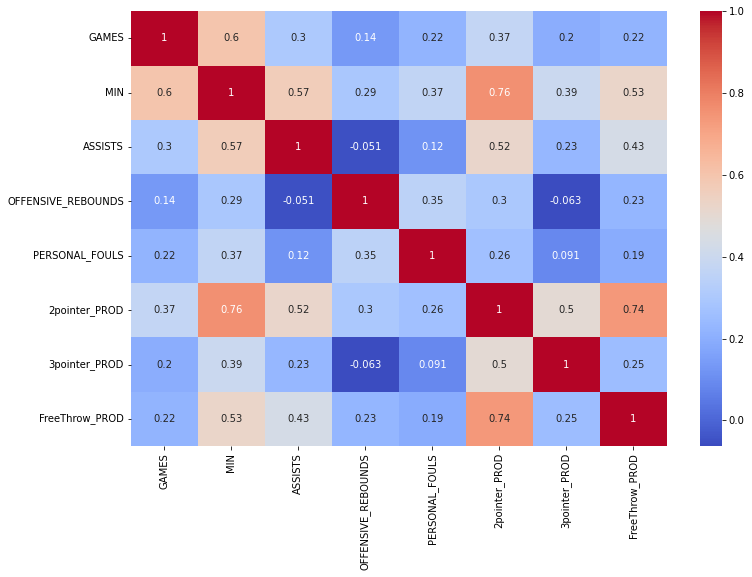

In [19]:
numv = X.columns
corr = X[numv].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True,cmap = 'coolwarm')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [21]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [22]:
for idx, col_name in enumerate(X_train.columns):
    print(f"The coefficient for {col_name} is {regression_model.coef_[idx]}")
intercept = regression_model.intercept_
print(f"The intercept for our model is {intercept}")
rsquare = regression_model.score(X_train, y_train)
rsquare_test = regression_model.score(X_test, y_test)
print(f"The R^2 for our model is {rsquare}")
print(f"The test R^2 for our model is {rsquare_test}")

The coefficient for GAMES is 11.717789367895005
The coefficient for MIN is 0.3782380987517735
The coefficient for ASSISTS is 0.2893517953079816
The coefficient for OFFENSIVE_REBOUNDS is -0.8692382301182185
The coefficient for PERSONAL_FOULS is -13.617238168700661
The coefficient for 2pointer_PROD is 6.21177031592548
The coefficient for 3pointer_PROD is 3.8831987025548873
The coefficient for FreeThrow_PROD is 6.647454036715482
The intercept for our model is -278.8166588059954
The R^2 for our model is 0.9566947569286645
The test R^2 for our model is 0.9511418585203155


In [23]:
X = add_constant(X)
OLS_model = OLS(y, X)
results = OLS_model.fit()
OLS_model = OLS_model.fit()

In [24]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 POINTS   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     9168.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        19:43:21   Log-Likelihood:                -21494.
No. Observations:                3454   AIC:                         4.301e+04
Df Residuals:                    3445   BIC:                         4.306e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -288.4336     12

In [25]:
# save the models with the pickels.
import pickle
filename = '../Models/Players_OLS.sav'
pickle.dump(OLS_model, open(filename, 'wb'))
filename = '../Models/Players_LinReg.sav'
pickle.dump(regression_model, open(filename, 'wb'))